# Car Fuel Consumption -- linear regression 


In [2]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

In [57]:
data = pd.read_csv('CarPrice_Assignment.csv')
data.head(5)

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


In [58]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   car_ID            205 non-null    int64  
 1   symboling         205 non-null    int64  
 2   CarName           205 non-null    object 
 3   fueltype          205 non-null    object 
 4   aspiration        205 non-null    object 
 5   doornumber        205 non-null    object 
 6   carbody           205 non-null    object 
 7   drivewheel        205 non-null    object 
 8   enginelocation    205 non-null    object 
 9   wheelbase         205 non-null    float64
 10  carlength         205 non-null    float64
 11  carwidth          205 non-null    float64
 12  carheight         205 non-null    float64
 13  curbweight        205 non-null    int64  
 14  enginetype        205 non-null    object 
 15  cylindernumber    205 non-null    object 
 16  enginesize        205 non-null    int64  
 1

In [55]:
data.describe()

,car_ID,symboling,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
count,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000
mean,103.000000,0.834146,98.756585,174.049268,65.907805,53.724878,2555.565854,126.907317,3.329756,3.255415,10.142537,104.117073,5125.121951,25.219512,30.751220,13276.710571
std,59.322565,1.245307,6.021776,12.337289,2.145204,2.443522,520.680204,41.642693,0.270844,0.313597,3.972040,39.544167,476.985643,6.542142,6.886443,7988.852332
min,1.000000,-2.000000,86.600000,141.100000,60.300000,47.800000,1488.000000,61.000000,2.540000,2.070000,7.000000,48.000000,4150.000000,13.000000,16.000000,5118.000000
25%,52.000000,0.000000,94.500000,166.300000,64.100000,52.000000,2145.000000,97.000000,3.150000,3.110000,8.600000,70.000000,4800.000000,19.000000,25.000000,7788.000000
50%,103.000000,1.000000,97.000000,173.200000,65.500000,54.100000,2414.000000,120.000000,3.310000,3.290000,9.000000,95.000000,5200.000000,24.000000,30.000000,10295.000000
75%,154.000000,2.000000,102.400000,183.100000,66.900000,55.500000,2935.000000,141.000000,3.580000,3.410000,9.400000,116.000000,5500.000000,30.000000,34.000000,16503.000000
max,205.000000,3.000000,120.900000,208.100000,72.300000,59.800000,4066.000000,326.000000,3.940000,4.170000,23.000000,288.000000,6600.000000,49.000000,54.000000,45400.000000


In [60]:
X = data['enginesize'].values

In [59]:
Y = data['price'].values



In [61]:
x_train, x_test, y_train, y_test = train_test_split(X, Y, train_size=0.7, test_size=0.3, random_state=21)
x_train = x_train.reshape(-1,1)
x_train
y_train


array([ 7775.,  9538.,  6785.,  7957.,  7463., 13415., 12764., 18920.,
        8949.,  9895., 16558., 22018., 17199.,  7995.,  6649.,  7198.,
       22470., 13495.,  7799.,  7129., 41315.,  8449., 28248., 19699.,
       16430.,  9988.,  9233., 12290., 10898., 16630., 12945., 17075.,
       11259.,  6849., 11048.,  9095.,  7299., 13950., 12964., 40960.,
       18150.,  6338.,  7295., 13499., 10945.,  6189.,  9298., 16925.,
        7898., 36000.,  9960.,  7689., 18280.,  8238., 25552.,  8499.,
        5499.,  7349., 45400.,  8189.,  6488.,  6855.,  5399.,  8948.,
       11694.,  8558.,  9295.,  6095., 16500., 16695., 13645., 18150.,
       15690.,  7738.,  7499.,  8845., 15750., 11248., 32250., 11245.,
       11900., 32528.,  6692.,  6229., 13499., 15645., 23875.,  6529.,
       34184.,  6692., 18344., 10795., 10698.,  9980.,  6918.,  7898.,
        6479.,  5389., 11850.,  5572., 28176.,  7775., 37028., 12440.,
       18620.,  8921.,  7099., 15040., 30760., 12629., 20970.,  8358.,
      

In [62]:
model = LinearRegression()
model.fit(x_train,y_train)
y_predict = model.predict(x_test.reshape(-1,1))
print(f"Train accuracy {model.score(x_train,y_train)*100} %")
print(f"Test accuracy {model.score(x_test.reshape(-1,1),y_test)*100} %")


Train accuracy 77.41556209945234 %
Test accuracy 72.70022055899241 %


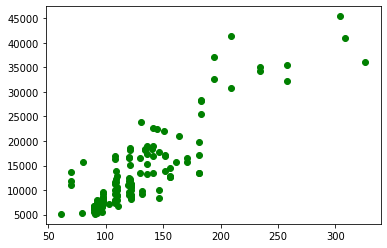

In [63]:
plt.scatter(x_train,y_train,color='green')

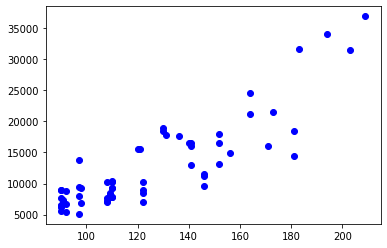

In [64]:
plt.scatter(x_test,y_test,color='blue')


<function matplotlib.pyplot.plot(*args, scalex=True, scaley=True, data=None, **kwargs)>

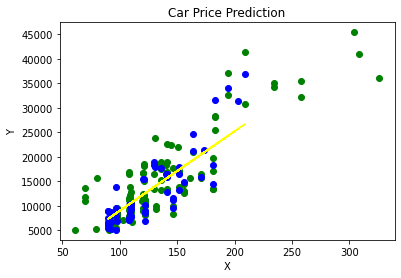

In [65]:
plt.scatter(x_train,y_train,color='green')
plt.scatter(x_test,y_test,color='blue')
plt.plot(x_test,y_predict , color='yellow')
plt.xlabel("X")
plt.ylabel("Y")
plt.title("Car Price Prediction")
plt.plot